# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [ ]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Read the Mapbox API key
load_dotenv()
mapbox_api = os.getenv("MAPBOX_PUBLIC_KEY")

## Load Data

In [23]:
# Read the census data into a Pandas DataFrame
file_path = Path("../SFO-HOUSING-DASHBOARD/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182946,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [24]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_units = sfo_data[['housing_units']].groupby('year').mean()
avg_units.head()

,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0


In [25]:
# Save the dataframe as a csv file
avg_units.to_csv("../SFO-HOUSING-DASHBOARD/sfo_housing_units.csv")

<AxesSubplot:title={'center':'Average Housing Units Sold in San Francisco (2010 - 2016)'}, xlabel='Year', ylabel='Housing Units'>

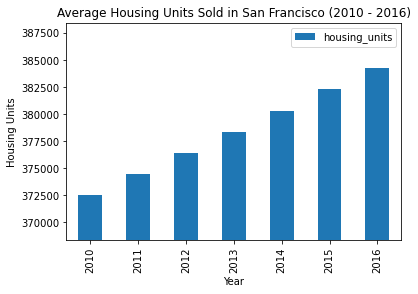

In [26]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
house_std = avg_units["housing_units"].std()
house_plot_min = avg_units["housing_units"].min() - house_std
house_plot_max = avg_units["housing_units"].max() + house_std

avg_units.plot.bar(ylim=(house_plot_min,house_plot_max),title="Average Housing Units Sold in San Francisco (2010 - 2016)",xlabel="Year",ylabel="Housing Units")

- - - 


## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [27]:
# Calculate the average sale price per square foot and average gross rent
avg_prices = sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
avg_prices

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


<AxesSubplot:title={'center':'Average Price per ft^2 San Francisco Homes Sold 2010 - 2016'}, xlabel='Year', ylabel='Price per ft^2 ($USD)'>

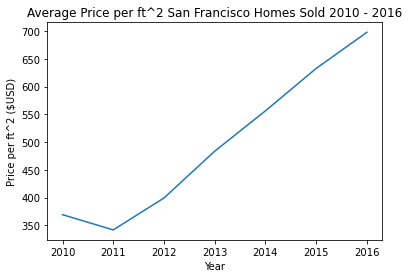

In [28]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
avg_prices['sale_price_sqr_foot'].plot(title="Average Price per ft^2 San Francisco Homes Sold 2010 - 2016",xlabel="Year",ylabel="Price per ft^2 ($USD)")

<AxesSubplot:title={'center':'Average San Francisco Rent (2010 - 2016)'}, xlabel='Year', ylabel='Average Rent ($USD)'>

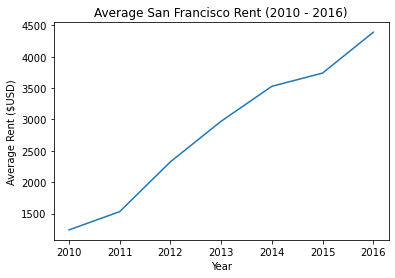

In [29]:
# Line chart for average montly rent
avg_prices['gross_rent'].plot(title="Average San Francisco Rent (2010 - 2016)",xlabel="Year",ylabel="Average Rent ($USD)")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [30]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_avgs = sfo_data.groupby(['year','neighborhood']).mean()
neighborhood_avgs

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182946       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [31]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_avgs['sale_price_sqr_foot'].hvplot.line(title="Average Home Sale Price per Square Foot",groupby='neighborhood',label='neighborhood')*avg_prices['sale_price_sqr_foot'].hvplot.line(label="San Francisco")

:DynamicMap   [neighborhood]
   :Overlay
      .Curve.Neighborhood  :Curve   [year]   (sale_price_sqr_foot)
      .Curve.San_Francisco :Curve   [year]   (sale_price_sqr_foot)

In [32]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_avgs['gross_rent'].hvplot.line(title="Average Monthly Rent",groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [33]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_price_by_neighborhood = neighborhood_avgs.groupby('neighborhood').mean().sort_values("sale_price_sqr_foot", ascending=False)
avg_price_by_neighborhood

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
...,...,...,...
Visitacion Valley,301.466180,381321.50,3657.000000
Outer Mission,242.370952,379374.50,2995.750000
Bayview,204.588623,376454.00,2318.400000


In [34]:
# Plotting the data from the top 10 expensive neighborhoods
top_most_expensive_neighborhoods = avg_price_by_neighborhood[['sale_price_sqr_foot']][:10]
top_most_expensive_neighborhoods.hvplot.bar(
    title='Top 10 Most Expensive San Francisco Neighborhoods',
    ylabel='home price per square foot',
    rot=45
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [35]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
top_ten = top_most_expensive_neighborhoods.index
top_most_expensive_by_year = neighborhood_avgs.reset_index()
top_most_expensive_by_year = top_most_expensive_by_year[top_most_expensive_by_year['neighborhood'].isin(top_ten)]
top_most_expensive_by_year.drop(columns='housing_units',inplace=True)
top_price_and_rent = top_most_expensive_by_year.groupby(['year','neighborhood']).mean()
top_price_and_rent

sale_price_sqr_foot  gross_rent
year neighborhood                                          
2010 Cow Hollow                      569.379968      1239.0
     Miraloma Park                   680.608729      1239.0
     Pacific Heights                 496.516014      1239.0
     Potrero Hill                    491.450004      1239.0
     Presidio Heights                549.417931      1239.0
     South Beach                    1037.099789      1239.0
     Telegraph Hill                  524.793509      1239.0
     Union Square District           569.193448      1239.0
2011 Cow Hollow                      390.595653      1530.0
     Miraloma Park                   414.676065      1530.0
     Pacific Heights                 509.021480      1530.0
     Potrero Hill                    503.138505      1530.0
     Presidio Heights                493.814917      1530.0
     South Beach                     388.644337      1530.0
     Telegraph Hill                  483.405773      1530.0
     Union Square District           302.123253      1530.0
2012 Cow Hollow                      644.818307      2324.0
     Merced Heights                  421.141245      2324.0
     Miraloma Park                   756.192373      2324.0
     Pacific Heights                 586.218215      2324.0
     Potrero Hill                    466.647840      2324.0
     Presidio Heights                426.608592      2324.0
     Telegraph Hill                  465.802122      2324.0
     Union Square District           445.196788      2324.0
2013 Cow Hollow                      707.402809      2971.0
     Pacific Heights                 503.899261      2971.0
     Potrero Hill                    598.704795      2971.0
     Presidio Heights                512.840248      2971.0
     Telegraph Hill                  653.311617      2971.0
     Union Square District          1290.472107      2971.0
2014 Cow Hollow                      691.865412      3528.0
     Merced Heights                  528.726541      3528.0
     Miraloma Park                  1267.766203      3528.0
     Pacific Heights                 824.658694      3528.0
     Potrero Hill                   1045.201546      3528.0
     Presidio Heights                603.450997      3528.0
     South Beach                     524.629312      3528.0
     Telegraph Hill                  708.193032      3528.0
     Union Square District           558.271119      3528.0
     Westwood Park                   742.979723      3528.0
2015 Cow Hollow                      598.620541      3739.0
     Pacific Heights                 910.187690      3739.0
     Potrero Hill                    821.300991      3739.0
     Presidio Heights                       NaN      3739.0
     Telegraph Hill                  996.990220      3739.0
     Union Square District          2258.702832      3739.0
2016 Cow Hollow                     1059.065602      4390.0
     Merced Heights                 1416.666667      4390.0
     Pacific Heights                 996.389364      4390.0
     Potrero Hill                    707.651609      4390.0
     Presidio Heights               1465.968586      4390.0
     Telegraph Hill                  903.049771      4390.0
     Westwood Park                   631.195426      4390.0

In [36]:
# Plotting the data from the top 10 expensive neighborhoods
top_price_and_rent.hvplot.bar(
    x='year',
    groupby='neighborhood',
    title="Most Expensive San Francisco Neighborhoods",
    xlabel="",ylabel="$USD",
    stacked=False, rot=90, height=500
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [37]:
# Load neighborhoods coordinates data
px.set_mapbox_access_token(mapbox_api)

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [38]:
# Calculate the mean values for each neighborhood
avg_price_by_neighborhood

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
...,...,...,...
Visitacion Valley,301.466180,381321.50,3657.000000
Outer Mission,242.370952,379374.50,2995.750000
Bayview,204.588623,376454.00,2318.400000


In [39]:
# Join the average values with the neighborhood locations
neighborhood_coords = pd.read_csv("../sfo-housing-dashboard/sfo_neighborhoods_coordinates.csv",index_col='Neighborhood')
neighborhood_avgs_coords = pd.concat([avg_price_by_neighborhood,neighborhood_coords],axis='columns',join='inner')
neighborhood_avgs_coords.index.rename('neighborhood',inplace=True)
neighborhood_avgs_coords.reset_index(inplace=True)
neighborhood_avgs_coords

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Union Square District,903.993258,377427.50,2555.166667,37.79101,-122.40210
1,Merced Heights,788.844818,380348.00,3414.000000,37.71993,-122.46595
2,Miraloma Park,779.810842,375967.25,2155.250000,37.73415,-122.45700
3,Pacific Heights,689.555817,378401.00,2817.285714,37.79298,-122.43579
4,Westwood Park,687.087575,382295.00,3959.000000,37.73415,-122.45700
...,...,...,...,...,...,...
64,Visitacion Valley,301.466180,381321.50,3657.000000,37.72874,-122.41098
65,Outer Mission,242.370952,379374.50,2995.750000,37.72280,-122.43869
66,Bayview,204.588623,376454.00,2318.400000,37.73467,-122.40106
67,Hunters Point,170.624920,377427.50,2489.000000,37.72551,-122.37178


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

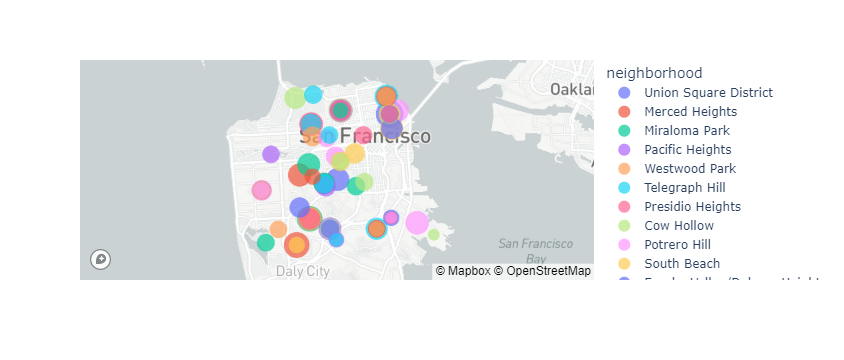

In [40]:
# Create a scatter mapbox to analyze neighborhood info
neighborhood_mapbox_plot = px.scatter_mapbox(neighborhood_avgs_coords,lat='Lat',lon='Lon',size='sale_price_sqr_foot',color='neighborhood',hover_data=['neighborhood','sale_price_sqr_foot','gross_rent'],zoom=10)
neighborhood_mapbox_plot

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [112]:
# Fetch the data from all expensive neighborhoods per year.
sfo_grouped = sfo_data.groupby(['year','neighborhood']).mean()
sfo_grouped.reset_index(inplace=True)

most_expensive_df = sfo_grouped[sfo_grouped['neighborhood'].isin(top_ten)]
most_expensive_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560.0,1239.0
31,2010,Miraloma Park,680.608729,372560.0,1239.0
41,2010,Pacific Heights,496.516014,372560.0,1239.0
46,2010,Potrero Hill,491.450004,372560.0,1239.0
47,2010,Presidio Heights,549.417931,372560.0,1239.0
49,2010,South Beach,1037.099789,372560.0,1239.0
52,2010,Telegraph Hill,524.793509,372560.0,1239.0
54,2010,Union Square District,569.193448,372560.0,1239.0
67,2011,Cow Hollow,390.595653,374507.0,1530.0
89,2011,Miraloma Park,414.676065,374507.0,1530.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


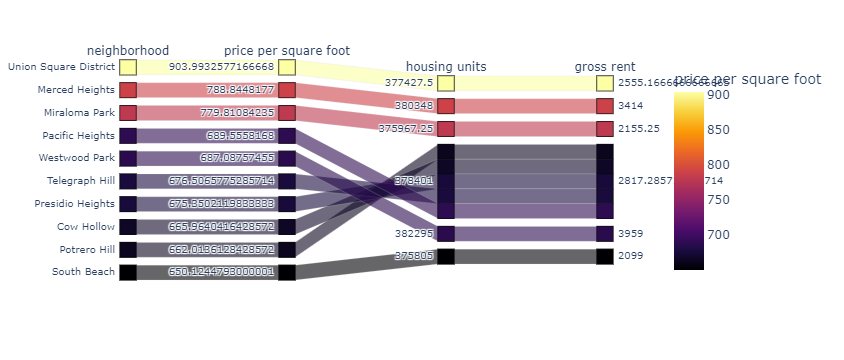

In [123]:
# Parallel Categories Plot
most_expensive_avg = most_expensive_df.groupby('neighborhood').mean()
most_expensive_avg.reset_index(inplace=True)
most_expensive_avg.sort_values('sale_price_sqr_foot',ascending=False,inplace=True)

px.parallel_categories(
    most_expensive_avg,
    dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood":"neighborhood",
        "sale_price_sqr_foot":"price per square foot",
        "housing_units":"housing units",
        "gross_rent":"gross rent",
    },
)

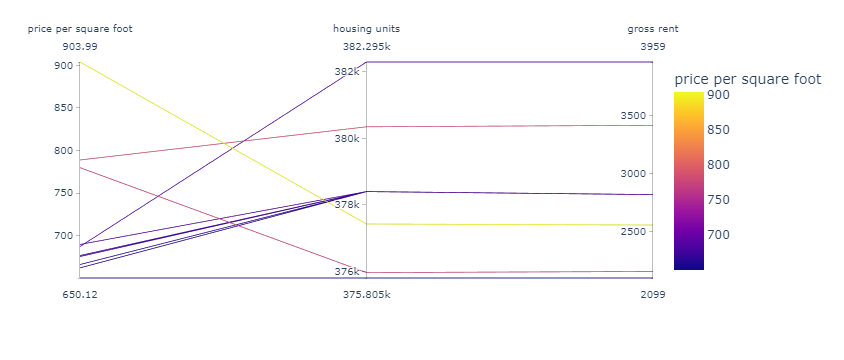

In [126]:
# Parallel Coordinates Plot
px.parallel_coordinates(most_expensive_avg,
    dimensions=['sale_price_sqr_foot','housing_units','gross_rent'],
    color='sale_price_sqr_foot',
    labels={
        "housing_units":"housing units",
        "sale_price_sqr_foot":"price per square foot",
        "gross_rent":"gross rent",
    },
)